**Learner Name: Damian Najera**

# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer
 
* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location 
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer 
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary 

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values 
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## **Please read the instructions carefully before starting the project.** 

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned. 

* Blanks '_______' are provided in the notebook that need to be filled with an appropriate code to get the correct result

* With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space

* Identify the task to be performed correctly and only then proceed to write the required code

* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code"

* Running incomplete code may throw an error

* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors

* Add the results/observations derived from the analysis in the presentation and submit the same in .pdf format

## Importing necessary libraries

In [9]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics 
from sklearn import metrics
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
import tensorflow as tf
# importing GridSearch CV
from sklearn.model_selection import GridSearchCV
# importing roc_curve to plot
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# importing SMOTE
from imblearn.over_sampling import SMOTE
# importing metrics
from sklearn import metrics
import random
#Importing classback API
from keras import callbacks

## Loading the dataset

In [15]:
data = pd.read_csv("Churn.csv")  # Complete the code to read the dataset 

## Data Overview

The initial steps to get an overview of any dataset is to: 
- Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Get information about the number of rows and columns in the dataset
- Find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data

### View the first and last 5 rows of the dataset.

In [17]:
data.head() ## Complete the code to display the first 5 rows of the dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [36]:
data.tail() ## Complete the code to display the last 5 rows of the dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understand the shape of the dataset

In [19]:
# checking shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 10000 rows and 14 columns.


### Check the data types of the columns for the dataset

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Creating a copy of original data

In [23]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

### Checking the Statistical Summary

In [24]:
# Let's look at the statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


#### Observations:
- The credit scores range from 350 to 850.
- Customers' ages vary from 18 to 92.
- Tenure with the bank spans from 0 to 10 years.
- The balance column has a minimum value of 0, indicating some customers have no balance.
- The number of products customers have ranges from 1 to 4.
- About 70.5% of customers have a credit card.
- Approximately 51.5% are active members.

### Checking for unique values for each of the column

In [25]:
# checking the number of unique values in each column
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

### Checking for Missing Values

In [26]:
# checking for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Observations:
There are no missing values in the dataset. 

### Drop the columns which are unique for all users like IDs, surnames, and rownumbers

In [27]:
# RowNumber , CustomerId and Surname are unique hence drop them
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1) 

## Exploratory Data Analysis

### Univariate Analysis

In [28]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [29]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

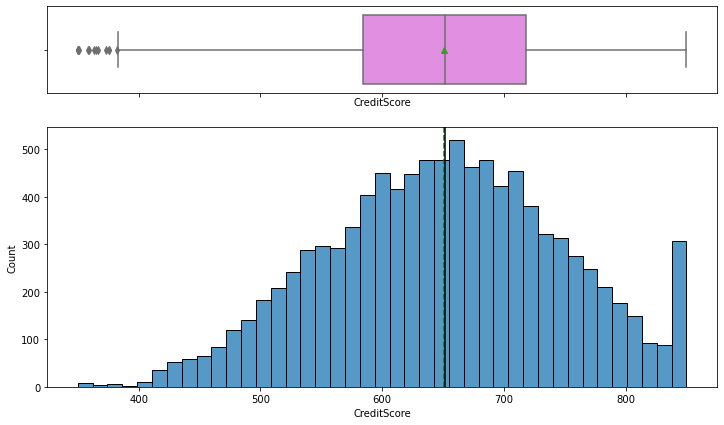

In [30]:
histogram_boxplot(df,'CreditScore')

#### Observations:
- The histogram suggests that the distribution of credit scores is roughly normal with a slight left-skew.
- The boxplot above the histogram shows the presence of a few lower outliers (below the lower whisker). This indicates that there are some customers with exceptionally low credit scores compared to the majority.
- Most of the credit scores lie between approximately 400 and 850, with the highest concentration of scores around the 650 mark.

#### Observations on Age

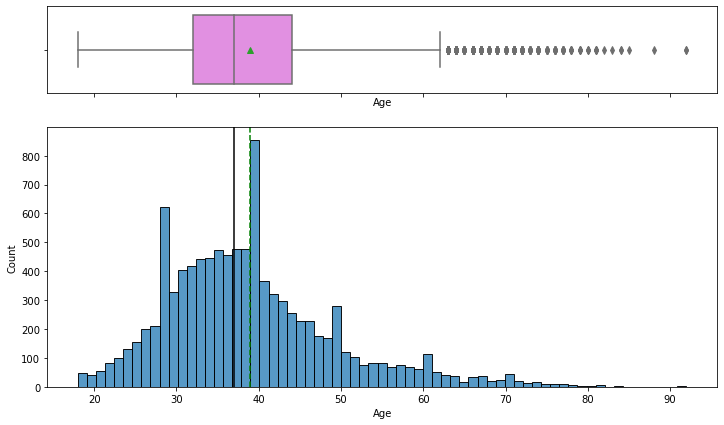

In [32]:
histogram_boxplot(df, 'Age') 

#### Observations:
- The distribution of ages is right-skewed, indicating that there are more younger customers compared to older ones.
- The boxplot above the histogram shows the presence of some upper outliers (above the upper whisker). This suggests that there are a few customers who are significantly older compared to the majority of the bank's clientele.
- The majority of customers are aged between roughly 20 and 60 years.
- There's a high concentration of customers in the age range of 30 to 40 years.

#### Observations on Balance

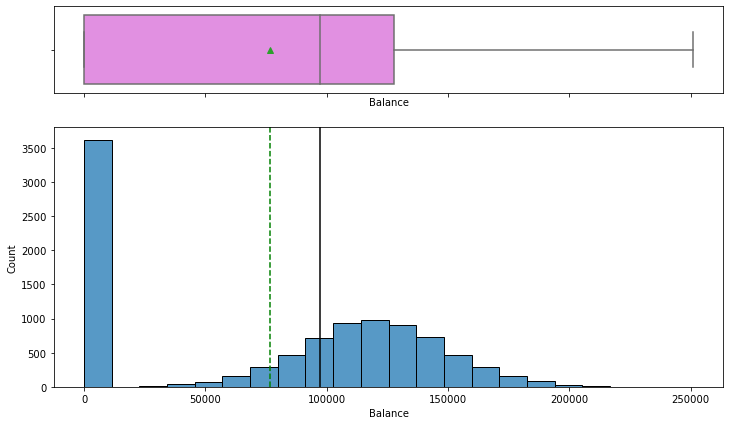

In [33]:
histogram_boxplot(df, 'Balance')

#### Observations:
-  There are two prominent peaks in the distribution of balances. One peak is near zero, and the other is around the middle of the range, approximately at 100,000. This could suggest there are two distinct groups of customers - those who maintain a low or zero balance and those who maintain a moderate balance around the 100,000 mark.
- A significant number of customers have a balance close to zero. This might indicate that many customers either have emptied their accounts or haven't used them actively.
- There don't appear to be any significant outliers on either end of the distribution.
- Most customers have balances ranging from 0 to approximately 250,000.

#### Observations on Estimated Salary

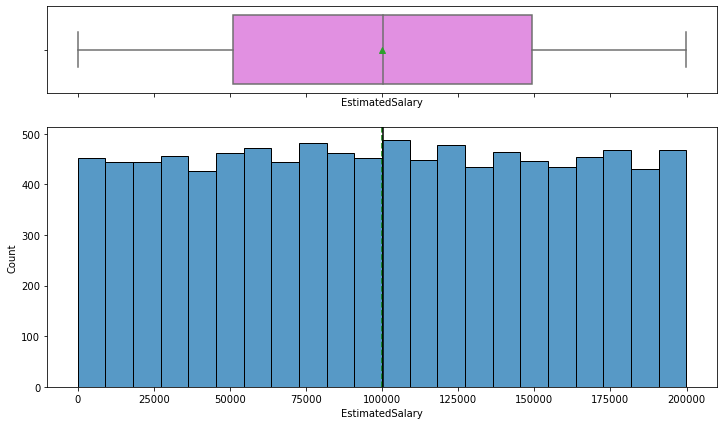

In [35]:
histogram_boxplot(df, 'EstimatedSalary')         

#### Observations:
- The distribution of estimated salaries is fairly uniform. This means that customers are spread out evenly across different salary levels.
- There don't appear to be any significant outliers on either end of the distribution, which aligns with the uniform distribution.
- Customers have estimated salaries ranging from almost 0 to just above 200,000, with an even distribution across this range.

#### Observations on Exited

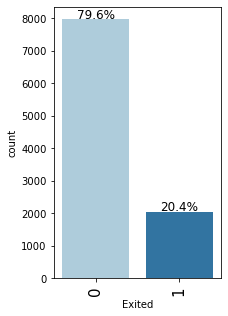

In [37]:
labeled_barplot(df, "Exited", perc=True)

#### Observations:
- Approximately 79.6% of customers (labeled as "0") did not leave the bank.
- Around 20.4% of customers (labeled as "1") exited the bank.

#### Observations on Geography

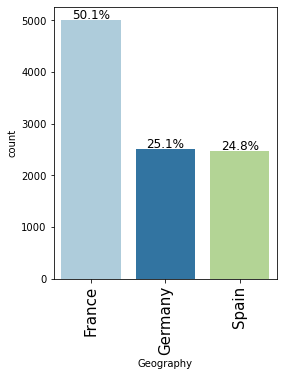

In [39]:
labeled_barplot(df, 'Geography', perc=True)

#### Observations:
- The majority of customers, approximately 50.1%, are from France.
- Around 25.1% of customers are from Germany.
- About 24.8% of customers are from Spain.

#### Observations on Gender

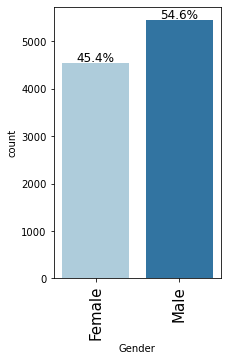

In [41]:
labeled_barplot(df, 'Gender', perc=True)

#### Observations:
- Approximately 54.6% of the bank's customers are male. 
- Around 45.4% of customers are female.

This indicates a fairly balanced distribution between male and female customers, with a slightly higher proportion of males. 

#### Observations on Tenure

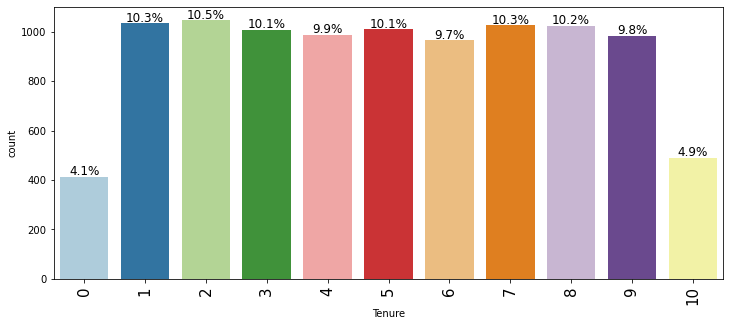

In [43]:
labeled_barplot(df, 'Tenure', perc=True)

#### Observations:
- The distribution of tenures is fairly even across different durations.
- Tenures of 1, 2, 7, 8, and 10 years have slightly higher proportions of customers, each with roughly 10% of the total customer base.
- Tenures of 0 (just joined) and 9 years have a slightly smaller percentage of customers, both just below 10%.

The relatively even distribution indicates that there isn't a specific time period where a large number of customers typically join or leave. This suggests that the bank has maintained a steady acquisition of customers over the years.

#### Observations on Number of Products

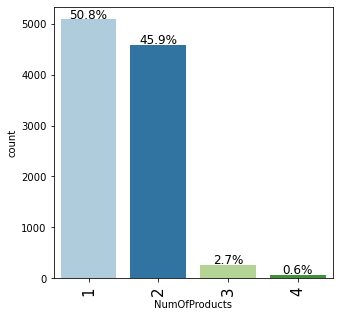

In [46]:
labeled_barplot(df, 'NumOfProducts', perc=True)              

#### Observations:
- The majority of customers, approximately 50.8%, have purchased just one product from the bank.
- Around 45.9% of customers have two products.
- Only about 2.7% of customers have three products.
- An even smaller proportion, roughly 0.6%, have four products.

These insights indicate that most customers have either one or two bank products. Very few customers have three or four products. 

#### Observations on Has Credit Card

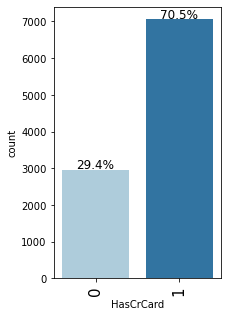

In [50]:
labeled_barplot(df, 'HasCrCard', perc=True)

#### Observations
-  A significant majority, approximately 70.5% of customers, have a credit card with the bank.
- About 29.5% of customers do not have a credit card.

#### Observations on Is Active Member

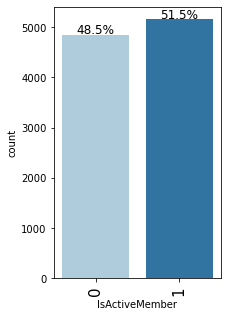

In [53]:
labeled_barplot(df, 'IsActiveMember', perc=True)

#### Observations:
-  Approximately 51.5% of customers are active members. These are customers who regularly use the bank's products and services.
- Around 48.5% of customers are not active members.

### Bivariate Analysis

In [56]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

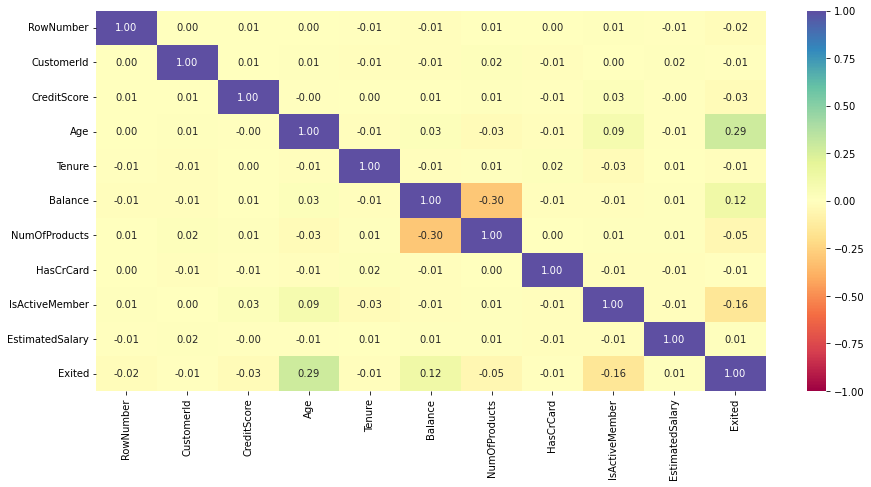

In [54]:
# Plot the heatmap for the data's correlation matrix
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")          # Complete the code to get the heatmap of the data
plt.show()

#### Observations:
- There's a positive correlation between Age and Exited, suggesting that older customers are more likely to churn.
- IsActiveMember has a negative correlation with Exited, indicating that active members are less likely to leave the bank.
- NumOfProducts also has a negative correlation with Exited, suggesting that customers with more products are less likely to churn.
- Age and NumOfProducts show a slight negative correlation, which means that as customers age, they tend to have fewer products with the bank.
- CreditScore and Age have a very weak negative correlation.
- HasCrCard and IsActiveMember have a weak negative correlation.

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


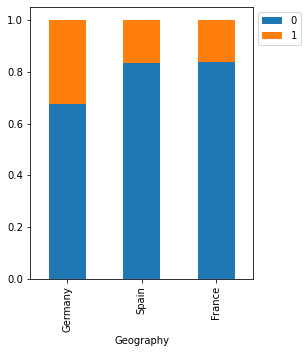

In [60]:
stacked_barplot(df, "Geography", "Exited")           

#### Observations:
- Out of 10,000 customers, 2,037 exited the bank, which is a 20.37% churn rate.
- Out of 5,014 customers from France, 810 exited, resulting in a churn rate of about 16.16%.
- Germany, with 2,509 customers, saw 814 of them exiting, leading to a significantly higher churn rate of about 32.44%.
- Out of 2,477 customers from Spain, 413 exited, which is a churn rate of about 16.67%.

These insights suggest that customers from Germany are more likely to leave the bank compared to those from France or Spain. 

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


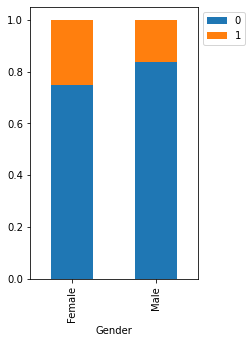

In [62]:
stacked_barplot(df, 'Gender', 'Exited') 

#### Observations:
- Out of 5,457 male customers, 898 exited, resulting in a churn rate of about 16.45%.
- Out of 4,543 female customers, 1,139 exited, leading to a higher churn rate of about 25.07%.

 This indicates that female customers are more likely to leave the bank than male customers.

#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


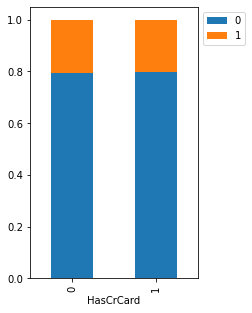

In [63]:
stacked_barplot(df, 'HasCrCard', 'Exited')  

#### Observations:
- Out of the 7,055 customers who possess a credit card, 1,424 exited. This results in a churn rate of about 20.18%. 
- Out of the 2,945 customers without a credit card, 613 exited. This results in a churn rate of about 20.81%. 

The similar churn rates among customers with and without credit cards suggest that the possession of a credit card isn't a significant factor influencing a customer's decision to leave the bank.

#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


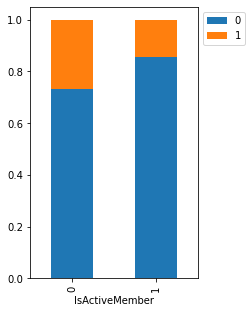

In [64]:
stacked_barplot(df, 'IsActiveMember', 'Exited')

#### Observations:
- Out of the 5,151 active customers, 735 exited. This results in a churn rate of about 14.27%.
- Out of the 4,849 inactive customers, 1,302 exited, giving a significantly higher churn rate of about 26.84%. 

These insights suggest that customer activity plays a crucial role in their decision to stay with or leave the bank. Active members are significantly less likely to churn compared to inactive members. 

#### Exited Vs Credit Score

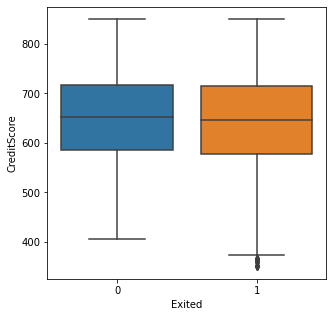

In [65]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=df)
plt.show()

#### Observations:
- For both groups (those who exited and those who didn't), the median credit score is nearly the same.
- The interquartile range - the range between the 25th percentile and the 75th percentile is also quite similar for both groups.
- Both groups have some lower outliers, indicating customers with particularly low credit scores. However, the number of outliers doesn't significantly differ between the two groups.
- The overall distribution of credit scores is quite similar for customers who exited and those who stayed.

From this visualization, it seems that CreditScore alone may not be a significant predictor of churn. The credit scores of customers who exited the bank are broadly in line with those who stayed. 

#### Exited Vs Age

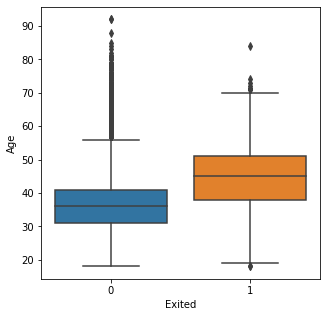

In [66]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=df)               ## Complete the code to plot the boxplot for Exited and Age
plt.show()

#### Observations:
- The median age is lower for customers who stayed with the bank.
- The interquartile range (IQR) is relatively tighter, indicating that a significant portion of these customers are younger.
- The median age is notably higher for customers who exited the bank.
- The IQR is broader, suggesting a wider age distribution among customers who churned.
- Older customers seem more likely to churn compared to younger customers.
- The age range of churned customers is also broader, suggesting that the decision to leave the bank isn't confined to a specific age group among older customers.

This visualization indicates that Age might be a significant predictor of churn. Older customers seem to be more prone to leaving the bank than younger ones. 

#### Exited Vs Tenure

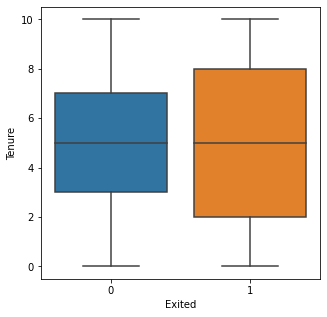

In [67]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=df)
plt.show()

#### Observations:
- The median tenure is around 5 years for customers who stayed with the bank.
- The interquartile range (IQR) is from approximately 3 to 7 years, indicating that a significant portion of these customers have been with the bank for a moderate duration.
- The median tenure is also around 5 years for customers who exited the bank.
- The IQR is similar to the non-churned group, spanning from about 2 to 8 years.
- The tenure distribution is quite similar for both customers who churned and those who did not.
- There doesn't seem to be a specific tenure duration where customers are more likely to churn.

From this visualization, it appears that Tenure alone might not be a strong predictor of churn. Customers who leave the bank come from various tenure durations, similar to those who stay. 

#### Exited Vs Balance

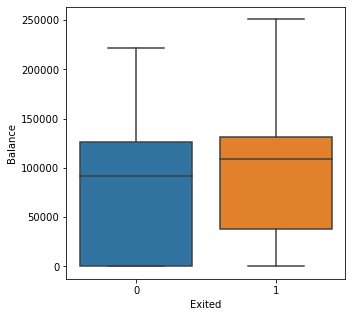

In [68]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=df)
plt.show()

#### Observations:
- Many customers who did not exit the bank have a balance near 0, which is evident from the lower whisker touching the bottom.
- The median balance for this group is notably lower than that of customers who exited.
- The upper quartile (top edge of the box) shows that a significant portion of these customers have a balance in the mid-range.
- The median balance is higher for customers who exited the bank, indicating that many churned customers had a substantial balance.
- The IQR is wider, suggesting a broad distribution of balances among customers who churned.
- Customers with higher balances seem more likely to churn compared to those with lower or zero balances.

This visualization suggests that Balance might be a significant predictor of churn. Customers with higher account balances seem more prone to leaving the bank.

#### Exited Vs Number of Products

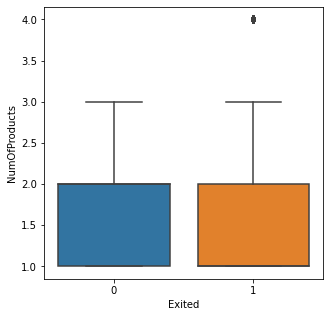

In [69]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=df)       

#### Observations:
- The majority of customers who did not exit the bank have either 1 or 2 products, as indicated by the box's range.
- The median number of products for this group is 1.
- The majority of customers who exited the bank also have either 1 or 2 products.
- The median number of products for this group is 1, similar to the non-churned group.
- However, there's a notable presence of customers with 3 products, and a few with 4 products, among those who exited.
- While the distribution for customers with 1 or 2 products is similar between those who stayed and those who exited, it seems that customers with 3 or more products are more likely to churn.

This visualization suggests that while having 1 or 2 products doesn't strongly differentiate between churners and non-churners, having more than 2 products might be a predictor of churn.

#### Exited Vs Estimated Salary

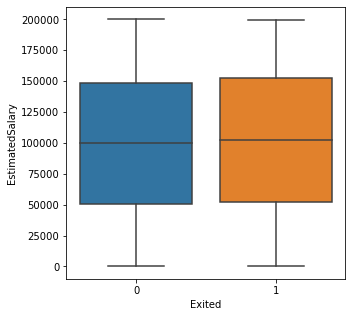

In [70]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=df)            
plt.show()

#### Observations:
- The distribution of estimated salaries for customers who did not exit the bank is fairly uniform, spanning from low to high values.
- The median estimated salary is roughly in the middle of the range, suggesting an even distribution of salaries.
- Similarly, the distribution of estimated salaries for customers who exited the bank is quite uniform, covering the entire range of values.
- The median estimated salary for this group is also approximately in the middle of the range.
- The estimated salary distributions are very similar for both customers who churned and those who did not.
- There doesn't seem to be a specific salary range that is more prone to churn.

From this visualization, it appears that EstimatedSalary alone might not be a significant predictor of churn. Customers from various salary brackets seem equally likely to stay or leave the bank. 

## Data Preprocessing

- We want to predict the churn.
- Before we proceed to build a model, We'll split the data into train and test to be able to evaluate the model that we build on the train data
-  we'll have to encode categorical features.
- We will build a model using the train data and then check it's performance

### Data Preparation for Modeling

In [ ]:
X = ds.drop(['_____'],axis=1)    ## Complete the code to obtain the independent features into variable X
y = ds[['_____']]                ## Complete the code to obtain the dependent features into variable y

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(_____,_____, test_size = 0.2, random_state = 42,stratify=y,shuffle = True) ## Complete the code to Split the X and y and obtain test set

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(_____,_____, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True) ## complete the code to Split X_large and y_large to obtain train and validation sets

**Create dummy variables for string type variables**

In [ ]:
# Encoding Geography variable
X_train = pd.get_dummies(X_train, columns=["____","____"],drop_first=True) ## Complete the code to encode Geography and Gender in train set
X_test = pd.get_dummies(X_test, columns=["____","____"],drop_first=True)   ## Complete the code to encode Geography and Gender in test set
X_val = pd.get_dummies(X_val, columns=["____","____"],drop_first=True)     ## Complete the code to encode Geography and Gender in validation set

**Normalize the numerical data**

In [ ]:
## Complete the below code to scale the data using standardscaler
sc=StandardScaler()
temp = sc.fit(X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]])
X_train[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_train[["_____","_____","_____","_____","_____"]])
X_test[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_test[["_____","_____","_____","_____","_____"]])
X_val[["CreditScore","Age","Tenure","Balance","EstimatedSalary"]] = temp.transform(X_val[["_____","_____","_____","_____","_____"]])

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
* Predicting a customer is exiting  and the customer  is not exiting
* Predicting a customer is not exiting and  customer is  exiting

**Which case is more important?**
* Predicting that customer is not exiting but he/she is exiting. It might cause loss to the banks because due to wrong identification bank will not be able to take any initiative for those sensitive customers. 

**How to reduce this loss i.e need to reduce False Negative?**
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative or in other words identifying the True Positive(i.e. Class 1) so that the bank can retain their customers.

**Create a function for plotting the confusion matrix**



In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

### Model Building: Neural Network

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
classifier = Sequential()
# Complete the code to Add the input layer with 64 neurons with relu as activation function with input of 11 variables
classifier.add(Dense(activation = '_____', input_dim = 11, units=_____))

# Complete the code to add the 1st hidden layer with 32 neurons
classifier.add(Dense(_____, activation='relu'))

# Add the output layer with one node and sigmoid activation function
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = '_____')) 

In [ ]:
## Complete the code to Compile the model with SGD optimizer and binary cross entropy as loss with accuracy as metrics
classifier.compile(optimizer='_____', loss='_____', metrics=['_____'])

In [ ]:
## Complete the code to obtain the summary of the model
_____.summary()

In [ ]:
## Complete the code to fit the model on train data for 100 epochs 
history=classifier.fit(_____, _____,           
          validation_data=(X_val,y_val),
          epochs=_____,
          batch_size=32)

**Loss function**

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

## Complete the code to evaluate the model on X_test and y_test
results = classifier.evaluate(_____, _____)

**Confusion matrix** 

In [ ]:
## Complete the code to obtain the prediction on X_val and obtain the confusion matrix 
y_pred1=classifier.predict(_____)

#Let's predict using default threshold
y_pred1 = (y_pred1 > 0.5)
cm2=confusion_matrix(y_val, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

### Model Building: Neural Network model with Adam Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
def create_model():
      ## Initializing the neural network
      model = Sequential()

      ##Complete the code to add the input layer with 64 neurons and relu as activation function
      model.add(Dense(_____,activation='_____',input_dim = X_train.shape[1]))

      ## Complete the code to add the first hidden layer with 32 neurons with relu as activation functions
      model.add(Dense(_____,activation='relu'))

      ## Complete the code to add the output layer with Sigmoid Activation
      model.add(Dense(1, activation = '_____'))
      
      ## Complete the code to initialize the model with Adam Optimer
      optimizer = tf.keras.optimizers._____(0.001)                                        

      ## Complete the code to compile the model with binary cross entropy as loss function and accuracy as metrics
      model.compile(loss='_____',optimizer=optimizer,metrics=['accuracy'])
      return model

In [ ]:
model=create_model()
model.summary()

In [ ]:
## Complete the code to fit the model on train data  
history = model.fit(_____,_____,batch_size=32,validation_data=(X_val,y_val),epochs=100,verbose=1)

**Loss function**

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

As you can see from the above image, this model is severely overfitting. Deep learning models are very sensitive to overfitting due to a large number of parameters. We need to find the optimal point where the training should be stopped.

The best solution for the above problem is **Early stopping**.

**Early stopping:** 

During training, the model is evaluated on a holdout validation dataset after each epoch. If the performance of the model on the validation dataset starts to degrade or no improvement (e.g. loss begins to increase or accuracy begins to decrease), then the training process is stopped after certain iterations. The model at the time that training is stopped is then used and is known to have good generalization performance.

This procedure is called “early stopping” and is perhaps one of the oldest and most widely used forms of neural network regularization.

In [ ]:
#Importing classback API 
# Defining Early stopping
es_cb = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

## Complete the code to call the create_model() function
model_e=______()

## Complete the code to train the model on X_train and y_train for 100 epochs and also use X_val and y_val as validation_data
history_e = model_e.fit(_____,_____,batch_size=32,epochs=_____,verbose=1,validation_data=(_____,_____),callbacks=[es_cb])

**Loss function**

In [ ]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_e.history['loss'])
plt.plot(history_e.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Let's tune the threshold using ROC-AUC**


There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates.

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

Sensitivity = TruePositive / (TruePositive + FalseNegative)


Specificity = TrueNegative / (FalsePositive + TrueNegative)

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score() and select the threshold with the largest G-Mean value.

In [ ]:
# predict probabilities
yhat = model_e.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Predict the results using  the best  threshold**

In [ ]:
#Predicting the results using best as a threshold
y_pred_e=model_e.predict(X_val)
y_pred_e = (y_pred_e > thresholds[ix])
y_pred_e

**Classification report**

In [ ]:
## Complete the code to obtain the classification report Hint: use y_val
cr=metrics.classification_report(_____,y_pred_e)
print(cr)

**Confusion matrix**

In [ ]:
## Complete the code with y_val and y_pred_e to plot the confusion matrix 

cm1=confusion_matrix(_____, _____)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

### Model Improvement: Neural Network model with Dropout

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_3 = Sequential()

#Adding the input layer with 32 neurons and relu as activation function
model_3.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))

# Complete the code to add dropout with dropout_rate= 0.2
model_3.add(Dropout(_____))

# Adding the first hidden layer with 16 neurons with relu as activation functions
model_3.add(Dense(16,activation='relu'))

# Complete the code to add dropout with dropout_rate= 0.1
model_3.add(Dropout(_____))
# Adding the second hidden layer with 8 neurons with relu as activation functions
model_3.add(Dense(8,activation='relu'))

# Adding the output layer
model_3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Summary of the model
model_3.summary()

In [ ]:
# Initialize the ANN with Adam optimizer 
optimizer = tf.keras.optimizers.Adam(0.001)

# Complete the code to compile the model with binary cross entropy as loss function and accuracy as metrics
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['______'])

In [ ]:
#Fitting the ANN with batch_size = 32 and 100 epochs 
history_3 = model_3.fit(X_train,y_train,batch_size=32,epochs=100,verbose=1,validation_data=(X_val,y_val),callbacks=[es_cb])

**Loss function**

In [ ]:
# Complete the code to plot the Train Loss and Validation Loss
plt.plot(history_3.history['_____'])
plt.plot(history_3.history['_____'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
# predict probabilities
yhat = model_3.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Predict the results using  the best  threshold**

In [ ]:
#Predicting the results using best as a threshold
y_pred_e=model_3.predict(X_val)
y_pred_3 = (y_pred_e > thresholds[ix])
y_pred_3

**Classification report**

In [ ]:
# Complete the code to obtain the classification report
cr=metrics.classification_report(_____,y_pred_3)
print(cr)

**Confusion report**

In [ ]:
# Complete the code to obtain the confusion matrix

cm1=_____(y_val, y_pred_3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

### Model Improvement: Neural Network model with Hyperparameter tuning

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
def create_model_v2(dropout_rate=0.1,lr=0.001,layer_1=64,layer_2=32):  
    np.random.seed(1337)

    #Initializing the neural network
    model = Sequential()

    # This adds the input layer (by specifying input dimension)
    model.add(Dense(layer_1,activation='relu',input_dim = X_train.shape[1]))

    ## Complete the code by adding dropout with dropout rate=0.5
    model.add(Dropout(0.5))

    # # Adding the hidden layer
    # Notice that we do not need to specify input dim. 
    model.add(Dense(layer_2,activation='relu'))

    # # Adding the output layer
    # Notice that we do not need to specify input dim. 
    # we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
    # We use the sigmoid because we want probability outcomes
    model.add(Dense(1, activation='sigmoid'))

    # Adding Adam initializer
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

    ## Complete the code to compile the model using binary_crossentropy as loss
    model.compile(optimizer = optimizer,loss = '_____', metrics = ['accuracy'])
    return model

**Using Grid search**

We are using grid search to optimize two hyperparameters called **batch size, epochs** due to the limited time. But you can optimize the other hyperparameters as mentioned above

In [ ]:
## Complete the code by calling the creat_model_v2 function in KerasClassifier
keras_estimator = KerasClassifier(build_fn=_____, verbose=1)

In [ ]:
# define the grid search parameters
param_grid = {
    'batch_size':[40, 64, 128],
    "lr":[0.01,0.001,0.1]}


kfold_splits = 3
# Complete the code by using the the defined keras_estimator as estimator.
grid = GridSearchCV(estimator=_____,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_grid=param_grid,n_jobs=-1)

In [ ]:
## Complete the code to fit the model on train data and use x_val and y_val as validation data
grid_result = grid.fit(_____, _____,validation_data = (_____,_____),verbose=1) 

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# Printing mean 
means = grid_result.cv_results_['mean_test_score']
# Printing standard deviation
stds = grid_result.cv_results_['std_test_score']
# Printing best parameters
params = grid_result.cv_results_['params']

**Let's create the final model with the obtained configuration after hyperparameter tuning**

In [ ]:
# Creating the model
estimator_v2=create_model_v2(lr=grid_result.best_params_['lr'])
# Printing model summary
estimator_v2.summary()

In [ ]:
## Complete the code to fit the model on train data abd train the model with best batch_size obtained from hyperparameter tuning
history_h=estimator_v2.fit(_____, _____, epochs=100, batch_size = grid_result.best_params_['_____'], verbose=1,validation_data=(X_val,y_val))

**Loss function**

In [ ]:
N =100
plt.figure(figsize=(8,6))
plt.plot(np.arange(0, N), history_h.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history_h.history["val_loss"], label="val_loss")

plt.title("Training Loss and Validation loss on the dataset")
plt.xlabel("Epoch #")
plt.ylabel("train_Loss/val_loss")
plt.legend(loc="center")
plt.show()

**Threshold**

In [ ]:
# predict probabilities
yhat = estimator_v2.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

**Predict the results using  the best  threshold**

In [ ]:
# Complete the code to obtain the predictions on X_val
y_pred_h = estimator_v2.predict(_____)
print(y_pred_h)

In [ ]:
# To use the confusion Matrix, we need to convert the probabilities that a customer will leave the bank into the form true or false. 
# So we will use the best cutoff value  to indicate whether they are likely to exit or not.
y_pred_h = (y_pred_h > thresholds[ix])
print(y_pred_h)

**Classification report**

In [ ]:
# Complete the code to obtain the classification report
cr=metrics._____(y_val,y_pred_h)
print(cr)

**Confusion matrix**

In [ ]:
## Complete the code to obtain the confusion matrix
cm_h=_____(y_val, y_pred_h)

labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

### Model Improvement: Neural Network model with balanced data

**Now try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [ ]:
## Complete the code to apply SMOTE on train data
sm  = _____(random_state=42)
X_train, y_train = sm.fit_resample(_____, _____) 
print('After UpSampling, the shape of train_X: {}'.format(X_train.shape)) 
print('After UpSampling, the shape of train_y: {} \n'.format(y_train.shape))

In [ ]:
sns.countplot(y_train['Exited'])

**Build a model with the balanced dataset**

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
## Complete the code to initilaize a sequential model
model_4 = _____()

# Complete the code to add a input layer of 32 neurons with relu as activation function 
model_4.add(Dense(_____,activation='____',input_dim = X_train.shape[1]))

# Complete the code to add dropout with dropout rate=0.2
model_4.add(_____(0.2))
# Adding hidden layer with 16 neurons with relu as activation function
model_4.add(Dense(16,activation='relu'))

# Adding the dropout
model_4.add(Dropout(0.1))

## Complete the code to add dense layers with 8 neurons
model_4.add(Dense(_____,activation='relu'))

# Complete the code to add suitable activation function in the final layer
model_4.add(Dense(1, activation = '_____'))

In [ ]:
## Complete the code to obtain the summary of the model
model_4._____()

In [ ]:
# Complete the code to define earlystopping as callback
es_cb = callbacks._____(monitor='val_loss', min_delta=0.001, patience=5)

# Initializing Adam optimizer
optimizer = tf.keras.optimizers.Adam(0.001)

# Complining the model with binary cross entropy as loss and accuracy as metrics
model_4.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])

# Complete the code to fit the model on train with batch_size of 64, epochs of 100 and callbacks as earlystopping
history_4 = model_4.fit(_____,_____,batch_size=___,epochs=100,verbose=1,validation_data = (X_val,y_val),callbacks=[_____])

**Loss function**

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history_4.history)
hist['epoch'] = history_4.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

**Finding the optimal  threshold**

In [ ]:
## Complete the code to find the optimal threshold using X_train
yhat = model_4.predict(_____)

# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
## Complete the code to obtain the predictions on X_val
y_pred_s = model_4.predict(_____)
#Predicting the results using tuned threshold
y_pred_s = (y_pred_s >thresholds[ix])
y_pred_s

**Classification report**

In [ ]:
cr=metrics.classification_report(y_val,y_pred_s)
print(cr)

**Confusion matrix**

In [ ]:
#Calculating the confusion matrix 
cm_s=confusion_matrix(y_val, y_pred_s)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_s, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

## Final Model




In [ ]:
# predict probabilities using the best model
yhat = ___________.predict(X_train)
# keep probabilities for the positive outcome only
yhat = yhat[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# Complete the code to Predict the X_test data using the best model
y_pred_test = ____________.predict(X_test)
y_pred_test = (y_pred_test > thresholds[ix])
print(y_pred_test)

**Classification report**

In [ ]:
## Complete the code to obtain the classification report on y_test and the predicted values
cr=metrics.classification_report(_____,_____)
print(cr)

**Confusion report**

In [ ]:
# Complete the code to obtain the confusion matrix 
cm_h=confusion_matrix(_____, _____)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm_h, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

## Actionable Insights and Business Recommendations

*

_____